In [5]:
from sklearn.datasets import load_iris

In [6]:
data=load_iris()

In [7]:
import pandas as pd
dataset=pd.DataFrame(data.data,columns=data.feature_names)
dataset["target"]=data.target
dataset.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [17]:
x=dataset.iloc[:,:4]
y=dataset.iloc[:,-1]


In [66]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

<h4>apply decision tree calssifier</h4>

In [67]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
d.score(x_train,y_train)

1.0

In [69]:
y_pred1=d.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9

<h4>hyper parameter tunning </h4>

In [71]:
parameter={
"criterion":["gini","entropy","log_loss"],
"max_depth" : [1,6,2,3,4,7],
"n_estimators":[10,20,30,50,60,80,100]

}

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rr=RandomForestClassifier()

In [74]:
g=GridSearchCV(estimator=rr,param_grid=parameter,cv=5,n_jobs=-1)

In [75]:
g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 6, 2, 3, 4, 7],
                         'n_estimators': [10, 20, 30, 50, 60, 80, 100]})

In [76]:
g.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=60)

In [77]:
g.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 60}

In [78]:
g.best_score_

0.9666666666666668

<h3>apply Random classifier</h3>

In [79]:
r=RandomForestClassifier(criterion="log_loss",max_depth=3,n_estimators=80)

In [80]:
r.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=3, n_estimators=80)

In [81]:
r.score(x_train,y_train)

0.975

In [82]:
single_tree = r.estimators_[2]

[Text(0.4583333333333333, 0.875, 'x[0] <= 5.55\nlog_loss = 1.563\nsamples = 74\nvalue = [50, 35, 35]'),
 Text(0.25, 0.625, 'x[1] <= 2.8\nlog_loss = 0.805\nsamples = 41\nvalue = [48, 11, 1]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 2.15\nlog_loss = 0.773\nsamples = 10\nvalue = [1, 11, 1]'),
 Text(0.08333333333333333, 0.125, 'log_loss = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.25, 0.125, 'log_loss = 0.414\nsamples = 9\nvalue = [0, 11, 1]'),
 Text(0.3333333333333333, 0.375, 'log_loss = 0.0\nsamples = 31\nvalue = [47, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[3] <= 1.75\nlog_loss = 1.157\nsamples = 33\nvalue = [2, 24, 34]'),
 Text(0.5, 0.375, 'x[1] <= 3.5\nlog_loss = 0.622\nsamples = 15\nvalue = [2, 23, 1]'),
 Text(0.4166666666666667, 0.125, 'log_loss = 0.25\nsamples = 13\nvalue = [0, 23, 1]'),
 Text(0.5833333333333334, 0.125, 'log_loss = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 4.85\nlog_loss = 0.191\nsamples = 18\nvalue = [0, 1, 33]'),

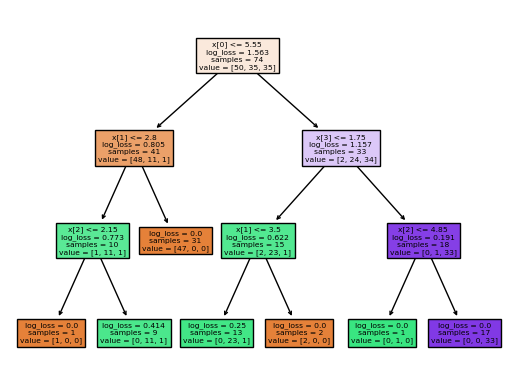

In [83]:
from sklearn import tree
tree.plot_tree(single_tree,filled=True)

In [84]:
y_pred=r.predict(x_test)

y_pred

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1])

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9